In [1]:
## 실제 데이터세트를 SQL과 파이썬으로 분석하기 (2024.07.07.)

In [2]:
## SQL 확장을 연결하고 데이터베이스 연결하기

In [5]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///socioeconomic.db

In [ ]:
## 테이블(표)안에 데이터 세트 보관하기
 >> 많은 데이터 세트들은 CSV 파일로 저장됨.
 >> SQL을 사용하여 데이터를 분석하기 위해 데이터베이스에 데이터를 보관해야함
 >> df.to_sql() 함수를 사용하여 CSV 파일을 sqlite에 넣어야 함

In [8]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [ ]:
## 표가 잘 만들어졌는지 확인

In [4]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [11]:
## 문제 1. 데이터세트에 몇개의 행이 있나요?
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [ ]:
## 문제 2. 50보다 많은 역경지표가 시카고 내 커뮤니티에 몇개가 있나요?
### hardship index란? 미국 내에 지역 사회 생활조건과 주민들의 경제적 어려움을 평가하는 지표
### 6개가 있음 : 1.소득수준 2.실업률, 3.교육수준, 4.주택소유율 5.인구밀도 6.빈곤율

In [12]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [ ]:
## 문제 3. 데이터세트에서 가장 큰 역경지표 값은 무엇인가요?

In [13]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [ ]:
## 문제4. 어떤 커뮤니티 지역이 가장 큰 역경지표를 가지고 있나요?

In [14]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [15]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [16]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data );


 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [ ]:
## 문제5. 어떤 시카고 커뮤니티가 6만불보다 큰 1인당 수입을 가지고 있나요?

In [17]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [ ]:
## 문제6. 1인당 소득과 역경지표로 산포표를 만들고 두 변수간의 연관관계를 설명해라

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap

 * sqlite:///socioeconomic.db
Done.


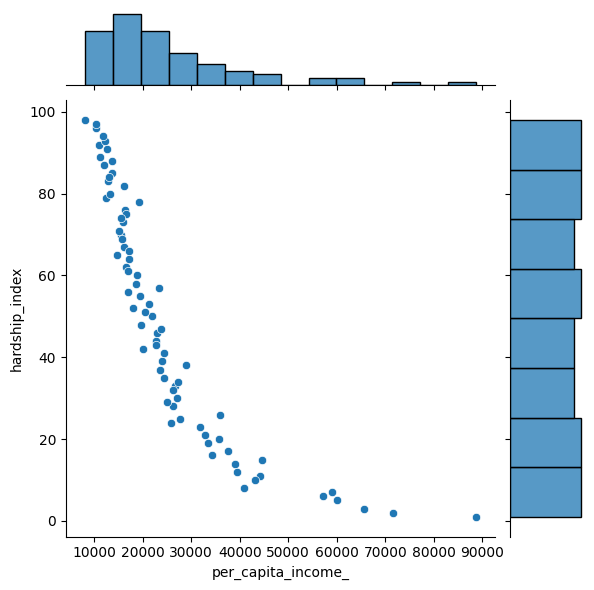

In [6]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

 * sqlite:///socioeconomic.db
Done.


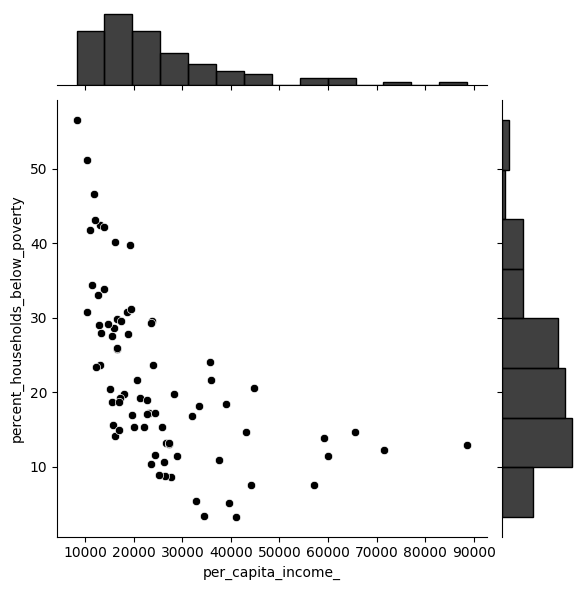

In [20]:
income_vs_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_poverty.DataFrame(),color='black')

 * sqlite:///socioeconomic.db
Done.


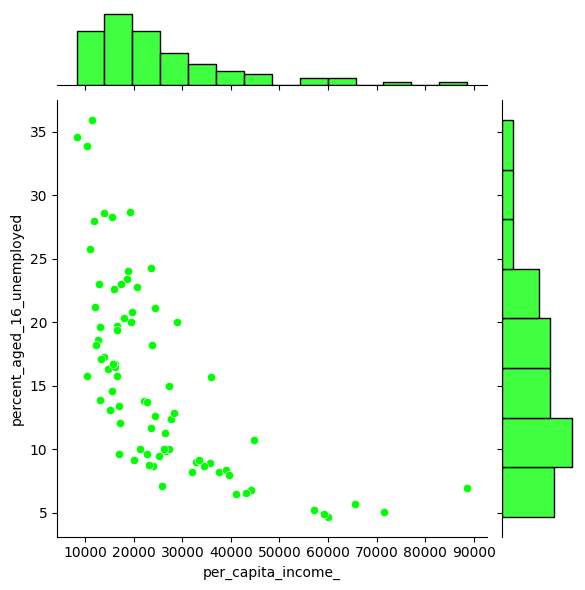

In [14]:
income_vs_unemployed = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_unemployed.DataFrame(), color='lime')